<h1><center>Air Pollution</center></h1>

 <h3> 1. Info about our dataset</h3>

In [26]:
import pandas as pd
import numpy as np

In [27]:
airp = pd.read_csv("air_pol.csv")
airp

,Unique_ID,Indicator_ID,Name,Measure,Measure_Info,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Time_Period,Start_Date,Data_Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,6/1/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,6/1/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,6/1/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,6/1/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/1/2008,5.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,6/1/2020,28.70,NaN
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,6/1/2020,29.56,NaN
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,6/1/2020,29.65,NaN
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,6/1/2020,29.28,NaN


In [28]:
airp.columns

Index(['Unique_ID', 'Indicator_ID', 'Name', 'Measure', 'Measure_Info',
       'Geo_Type_Name', 'Geo_Join_ID', 'Geo_Place_Name', 'Time_Period',
       'Start_Date', 'Data_Value', 'Message'],
      dtype='object')

In [29]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique_ID       16122 non-null  int64  
 1   Indicator_ID    16122 non-null  int64  
 2   Name            16121 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure_Info    16122 non-null  object 
 5   Geo_Type_Name   16121 non-null  object 
 6   Geo_Join_ID     16122 non-null  int64  
 7   Geo_Place_Name  16122 non-null  object 
 8   Time_Period     16121 non-null  object 
 9   Start_Date      16121 non-null  object 
 10  Data_Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [30]:
airp.describe()

,Unique_ID,Indicator_ID,Geo_Join_ID,Data_Value,Message
count,16122.000000,16122.000000,1.612200e+04,16122.000000,0.0
mean,339480.955589,427.131063,6.133394e+05,19.129163,NaN
std,194099.809551,109.657607,7.916715e+06,21.673789,NaN
min,130355.000000,365.000000,1.000000e+00,0.000000,NaN
25%,172183.250000,365.000000,2.020000e+02,8.460000,NaN
50%,221882.500000,375.000000,3.030000e+02,13.900000,NaN
75%,547749.750000,386.000000,4.040000e+02,25.470000,NaN
max,671122.000000,661.000000,1.051061e+08,424.700000,NaN


In [31]:
airp = airp.drop(columns = ["Unique_ID", "Measure_Info", "Message"])
airp.columns

Index(['Indicator_ID', 'Name', 'Measure', 'Geo_Type_Name', 'Geo_Join_ID',
       'Geo_Place_Name', 'Time_Period', 'Start_Date', 'Data_Value'],
      dtype='object')

<h3>2. Data cleaning </h3>

In [32]:
airp = airp.dropna()
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 0 to 16121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator_ID    16118 non-null  int64  
 1   Name            16118 non-null  object 
 2   Measure         16118 non-null  object 
 3   Geo_Type_Name   16118 non-null  object 
 4   Geo_Join_ID     16118 non-null  int64  
 5   Geo_Place_Name  16118 non-null  object 
 6   Time_Period     16118 non-null  object 
 7   Start_Date      16118 non-null  object 
 8   Data_Value      16118 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


In [33]:
time_period = airp["Time_Period"]
time_period

0           Summer 2013
1           Summer 2014
2           Summer 2013
3           Summer 2014
4        Winter 2008-09
              ...      
16117       Summer 2020
16118       Summer 2020
16119       Summer 2020
16120       Summer 2020
16121       Summer 2020
Name: Time_Period, Length: 16118, dtype: object

In [34]:
import re
year_regex = re.compile(r'\d{4}')

def extract_year(row):
    match = year_regex.search(row['Time_Period'])
    if match:
        return match.group()
    else:
        return None

airp['Year'] = airp.apply(extract_year, axis=1)

airp = airp.dropna()
airp

,Indicator_ID,Name,Measure,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Time_Period,Start_Date,Data_Value,Year
0,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),Summer 2013,6/1/2013,34.64,2013
1,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),Summer 2014,6/1/2014,33.22,2014
2,386,Ozone (O3),Mean,Borough,1,Bronx,Summer 2013,6/1/2013,31.25,2013
3,386,Ozone (O3),Mean,Borough,1,Bronx,Summer 2014,6/1/2014,31.15,2014
4,383,Sulfur Dioxide (SO2),Mean,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/1/2008,5.89,2008
...,...,...,...,...,...,...,...,...,...,...
16117,386,Ozone (O3),Mean,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,6/1/2020,28.70,2020
16118,386,Ozone (O3),Mean,CD,305,East New York and Starrett City (CD5),Summer 2020,6/1/2020,29.56,2020
16119,386,Ozone (O3),Mean,CD,304,Bushwick (CD4),Summer 2020,6/1/2020,29.65,2020
16120,386,Ozone (O3),Mean,CD,303,Bedford Stuyvesant (CD3),Summer 2020,6/1/2020,29.28,2020


In [35]:
airp = airp.drop(columns = "Time_Period")
airp

,Indicator_ID,Name,Measure,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Start_Date,Data_Value,Year
0,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),6/1/2013,34.64,2013
1,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),6/1/2014,33.22,2014
2,386,Ozone (O3),Mean,Borough,1,Bronx,6/1/2013,31.25,2013
3,386,Ozone (O3),Mean,Borough,1,Bronx,6/1/2014,31.15,2014
4,383,Sulfur Dioxide (SO2),Mean,CD,211,Morris Park and Bronxdale (CD11),12/1/2008,5.89,2008
...,...,...,...,...,...,...,...,...,...
16117,386,Ozone (O3),Mean,CD,306,Park Slope and Carroll Gardens (CD6),6/1/2020,28.70,2020
16118,386,Ozone (O3),Mean,CD,305,East New York and Starrett City (CD5),6/1/2020,29.56,2020
16119,386,Ozone (O3),Mean,CD,304,Bushwick (CD4),6/1/2020,29.65,2020
16120,386,Ozone (O3),Mean,CD,303,Bedford Stuyvesant (CD3),6/1/2020,29.28,2020


<h3> 3. Data Vizualization </h3>

In [36]:
measure_counts = airp['Measure'].value_counts()
labels = measure_counts.index
sizes = measure_counts.values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Pie Chart of Measure Counts')
plt.show()

NameError: name 'plt' is not defined

In [37]:
name_counts = airp["Name"].value_counts()
name_counts

Fine Particulate Matter (PM2.5)                                                 5076
Nitrogen Dioxide (NO2)                                                          5075
Ozone (O3)                                                                      1692
Sulfur Dioxide (SO2)                                                            1126
PM2.5-Attributable Asthma Emergency Department Visits                            384
O3-Attributable Asthma Emergency Department Visits                               384
O3-Attributable Asthma Hospitalizations                                          384
Traffic Density- Annual Vehicle Miles Traveled for Cars                          213
Traffic Density- Annual Vehicle Miles Traveled                                   209
Traffic Density- Annual Vehicle Miles Traveled for Trucks                        209
PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)     192
O3-Attributable Cardiac and Respiratory Deaths                   

In [38]:
labels = name_counts.index
sizes = name_counts.values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Pie Chart of Name Counts')
plt.show()

NameError: name 'plt' is not defined

In [39]:
fig, ax = plt.subplots()
airp.boxplot(column='Data_Value', by='Geo_Type_Name', ax=ax)
ax.set_ylabel('Pollution value')
ax.set_title('Pollution values by geographic type')
plt.show()

NameError: name 'plt' is not defined

NameError: name 'plt' is not defined

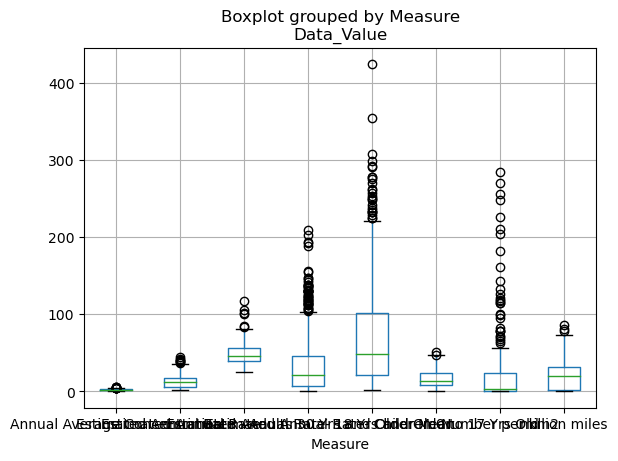

In [40]:
airp.boxplot(column='Data_Value', by='Measure')
plt.xlabel('Measure')
plt.ylabel('Data Value')
plt.title('Box Plot of Data Values by Measure')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(airp['Indicator_ID'], airp['Data_Value'])
ax.set_xlabel('Indicator ID')
ax.set_ylabel('Data Value')
ax.set_title('Scatter Plot of Indicator ID vs Data Value')
plt.show()

NameError: name 'plt' is not defined

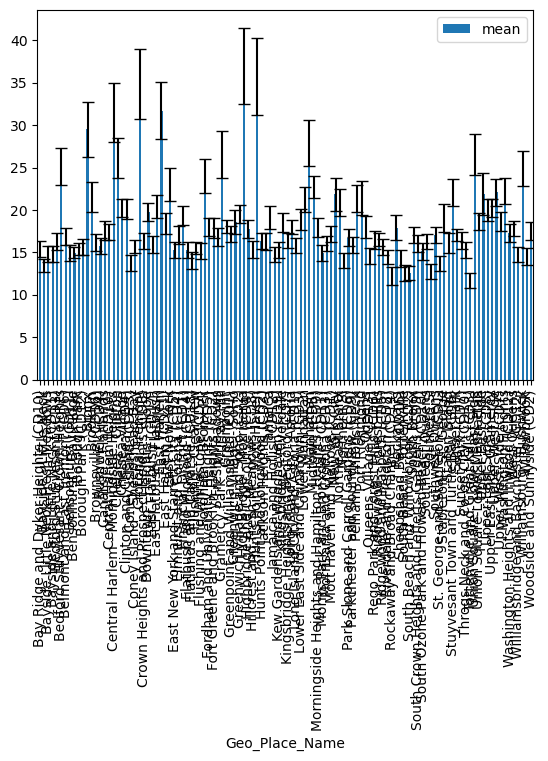

In [41]:
place_data = airp.groupby('Geo_Place_Name').agg({'Data_Value': ['mean', 'sem']})


place_data.plot(kind='bar', y='Data_Value', yerr='sem', capsize=4)
plt.xlabel('Geo Place Name')
plt.ylabel('Mean Data Value')
plt.title('Bar Chart with Error Bars of Mean Data Value by Geo Place Name')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
airp.groupby("Geo_Type_Name")["Data_Value"].mean().plot(kind="bar", ax=ax)
ax.set_ylabel("Average Data Value")
plt.show()

In [ ]:
mean_by_geo = airp.groupby(['Geo_Type_Name', 'Name'])['Data_Value'].mean()
print('Mean Data_Value by Geo_Type_Name and Name:\n', mean_by_geo)

In [42]:
sns.heatmap(airp[['Data_Value', 'Geo_Join_ID']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Data_Value and Geo_Join_ID')
plt.show()

NameError: name 'sns' is not defined

In [43]:
import seaborn as sns
pivot_data = airp.pivot_table(values='Data_Value', index='Geo_Place_Name', columns='Measure', aggfunc='mean')

NameError: name 'plt' is not defined

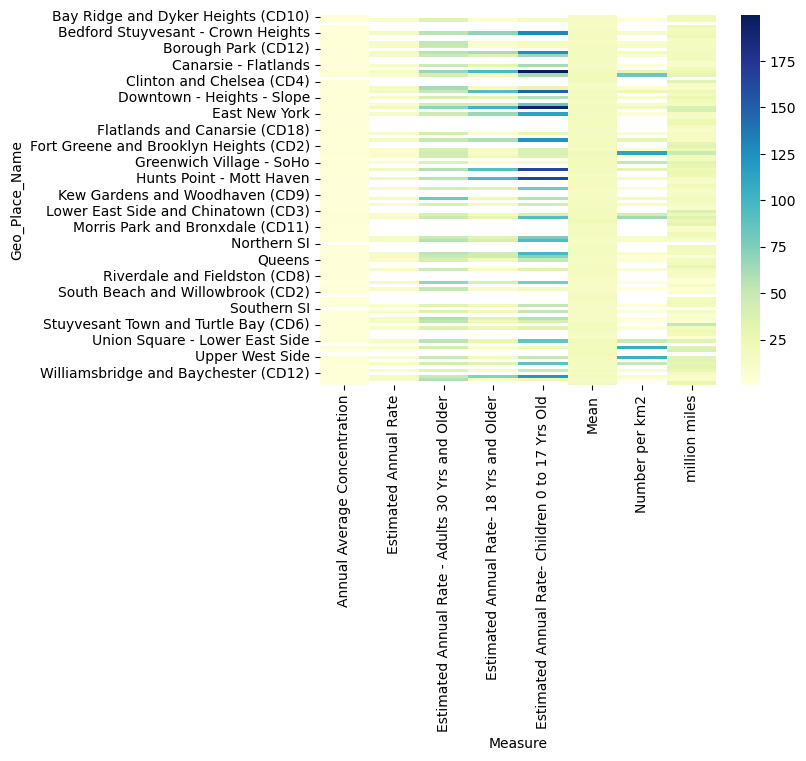

In [44]:
sns.heatmap(pivot_data, cmap='YlGnBu')
plt.xlabel('Measure')
plt.ylabel('Geo Place Name')
plt.title('Heatmap of Mean Data Value by Geo Place Name and Measure')
plt.show()

In [ ]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="Indicator_ID", y="Data_Value", data=airp, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [45]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 0 to 16121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator_ID    16118 non-null  int64  
 1   Name            16118 non-null  object 
 2   Measure         16118 non-null  object 
 3   Geo_Type_Name   16118 non-null  object 
 4   Geo_Join_ID     16118 non-null  int64  
 5   Geo_Place_Name  16118 non-null  object 
 6   Start_Date      16118 non-null  object 
 7   Data_Value      16118 non-null  float64
 8   Year            16118 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


NameError: name 'plt' is not defined

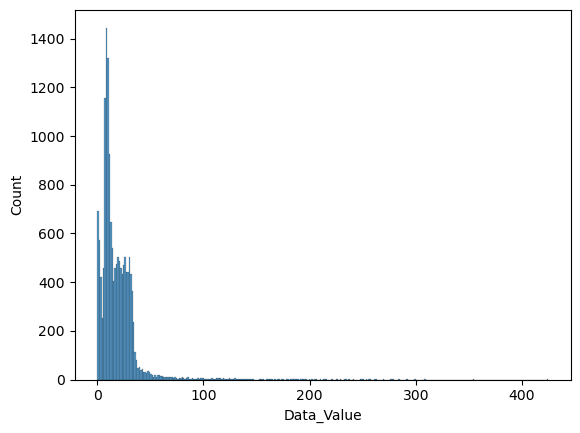

In [46]:
sns.histplot(airp['Data_Value'])
plt.title('Distribution of Data_Value')
plt.show()

In [47]:
pm25_2017 = airp[(airp["Name"] == "Fine Particulate Matter (PM2.5)") & (airp["Year"] == "2017")]

plt.hist(pm25_2017["Data_Value"], bins=20)
plt.xlabel("PM2.5 Levels")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5 Levels in NYC, 2017")
plt.show()

NameError: name 'plt' is not defined

In [48]:
pollution_by_area = airp.groupby('Geo_Place_Name')['Data_Value'].mean()

pollution_by_area = pollution_by_area.sort_values(ascending=False)

plt.bar(pollution_by_area.index, pollution_by_area.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Mean Pollution Level')
plt.title('Mean Pollution Levels by Neighborhood')
plt.show()

NameError: name 'plt' is not defined

In [49]:
print("The area with the highest mean pollution level is", pollution_by_area.index[0])

The area with the highest mean pollution level is High Bridge - Morrisania


In [50]:
pollution_by_indicator = airp.groupby('Name')['Data_Value'].mean()

pollution_by_indicator = pollution_by_indicator.sort_values(ascending=False)

print(pollution_by_indicator)

Name
O3-Attributable Asthma Emergency Department Visits                              74.718229
PM2.5-Attributable Asthma Emergency Department Visits                           71.417994
Boiler Emissions- Total NOx Emissions                                           53.791667
PM2.5-Attributable Deaths                                                       49.116530
Ozone (O3)                                                                      30.367398
Traffic Density- Annual Vehicle Miles Traveled                                  30.307177
Traffic Density- Annual Vehicle Miles Traveled for Cars                         28.329577
Nitrogen Dioxide (NO2)                                                          21.275992
PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)    18.554893
PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)       14.865290
O3-Attributable Asthma Hospitalizations                                         13.119531
Boile

In [51]:
fig, ax = plt.subplots()
ax.bar(pollution_by_indicator.index, pollution_by_indicator)
ax.set_xticklabels(pollution_by_indicator.index, rotation=90)
ax.set_ylabel('Mean pollution level')
ax.set_title('Mean pollution level by indicator')
plt.show()

NameError: name 'plt' is not defined

In [52]:
airp["Start_Date"] = pd.to_datetime(airp["Start_Date"])

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(airp["Start_Date"], airp["Data_Value"], s=10)
ax.set_xlabel("Start Date")
ax.set_ylabel("Data Value")
plt.show()

NameError: name 'plt' is not defined

In [53]:
data_pivot = airp.pivot_table(index="Indicator_ID", columns="Year", values="Data_Value", aggfunc="mean")

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_pivot, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

NameError: name 'plt' is not defined

<span style="color:#011f4b; font-size:15px; ">
 <h3> 4. Data encoding </h3>

In [54]:
airp.describe()

,Indicator_ID,Geo_Join_ID,Data_Value
count,16118.000000,1.611800e+04,16118.000000
mean,427.126318,6.134915e+05,19.129856
std,109.656038,7.917692e+06,21.675438
min,365.000000,1.000000e+00,0.000000
25%,365.000000,2.020000e+02,8.460000
50%,375.000000,3.030000e+02,13.900000
75%,386.000000,4.040000e+02,25.470000
max,661.000000,1.051061e+08,424.700000


In [55]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 0 to 16121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Indicator_ID    16118 non-null  int64         
 1   Name            16118 non-null  object        
 2   Measure         16118 non-null  object        
 3   Geo_Type_Name   16118 non-null  object        
 4   Geo_Join_ID     16118 non-null  int64         
 5   Geo_Place_Name  16118 non-null  object        
 6   Start_Date      16118 non-null  datetime64[ns]
 7   Data_Value      16118 non-null  float64       
 8   Year            16118 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [56]:
airp

,Indicator_ID,Name,Measure,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Start_Date,Data_Value,Year
0,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),2013-06-01,34.64,2013
1,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),2014-06-01,33.22,2014
2,386,Ozone (O3),Mean,Borough,1,Bronx,2013-06-01,31.25,2013
3,386,Ozone (O3),Mean,Borough,1,Bronx,2014-06-01,31.15,2014
4,383,Sulfur Dioxide (SO2),Mean,CD,211,Morris Park and Bronxdale (CD11),2008-12-01,5.89,2008
...,...,...,...,...,...,...,...,...,...
16117,386,Ozone (O3),Mean,CD,306,Park Slope and Carroll Gardens (CD6),2020-06-01,28.70,2020
16118,386,Ozone (O3),Mean,CD,305,East New York and Starrett City (CD5),2020-06-01,29.56,2020
16119,386,Ozone (O3),Mean,CD,304,Bushwick (CD4),2020-06-01,29.65,2020
16120,386,Ozone (O3),Mean,CD,303,Bedford Stuyvesant (CD3),2020-06-01,29.28,2020


In [57]:
airp = airp.drop(columns = ['Indicator_ID', 'Geo_Join_ID', 'Start_Date'])

In [58]:
airp

,Name,Measure,Geo_Type_Name,Geo_Place_Name,Data_Value,Year
0,Ozone (O3),Mean,CD,Coney Island (CD13),34.64,2013
1,Ozone (O3),Mean,CD,Coney Island (CD13),33.22,2014
2,Ozone (O3),Mean,Borough,Bronx,31.25,2013
3,Ozone (O3),Mean,Borough,Bronx,31.15,2014
4,Sulfur Dioxide (SO2),Mean,CD,Morris Park and Bronxdale (CD11),5.89,2008
...,...,...,...,...,...,...
16117,Ozone (O3),Mean,CD,Park Slope and Carroll Gardens (CD6),28.70,2020
16118,Ozone (O3),Mean,CD,East New York and Starrett City (CD5),29.56,2020
16119,Ozone (O3),Mean,CD,Bushwick (CD4),29.65,2020
16120,Ozone (O3),Mean,CD,Bedford Stuyvesant (CD3),29.28,2020


In [59]:
#Encoding of Name
airp['NameEnc'] = airp['Name'].astype('category').cat.codes

#Encoding of Measure
airp['MeasureEnc'] = airp['Measure'].astype('category').cat.codes

#Geo_Type_Name
airp['Geo_Type_NameEnc'] = airp['Geo_Type_Name'].astype('category').cat.codes

#Geo_Place_Name
airp['Geo_Place_NameEnc'] = airp['Geo_Place_Name'].astype('category').cat.codes

#Converting Year to int64 dtype
airp['Year'] = airp['Year'].astype('int64')

In [60]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 0 to 16121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               16118 non-null  object 
 1   Measure            16118 non-null  object 
 2   Geo_Type_Name      16118 non-null  object 
 3   Geo_Place_Name     16118 non-null  object 
 4   Data_Value         16118 non-null  float64
 5   Year               16118 non-null  int64  
 6   NameEnc            16118 non-null  int8   
 7   MeasureEnc         16118 non-null  int8   
 8   Geo_Type_NameEnc   16118 non-null  int8   
 9   Geo_Place_NameEnc  16118 non-null  int8   
dtypes: float64(1), int64(1), int8(4), object(4)
memory usage: 944.4+ KB


In [61]:
airp

,Name,Measure,Geo_Type_Name,Geo_Place_Name,Data_Value,Year,NameEnc,MeasureEnc,Geo_Type_NameEnc,Geo_Place_NameEnc
0,Ozone (O3),Mean,CD,Coney Island (CD13),34.64,2013,10,5,1,21
1,Ozone (O3),Mean,CD,Coney Island (CD13),33.22,2014,10,5,1,21
2,Ozone (O3),Mean,Borough,Bronx,31.25,2013,10,5,0,11
3,Ozone (O3),Mean,Borough,Bronx,31.15,2014,10,5,0,11
4,Sulfur Dioxide (SO2),Mean,CD,Morris Park and Bronxdale (CD11),5.89,2008,15,5,1,65
...,...,...,...,...,...,...,...,...,...,...
16117,Ozone (O3),Mean,CD,Park Slope and Carroll Gardens (CD6),28.70,2020,10,5,1,71
16118,Ozone (O3),Mean,CD,East New York and Starrett City (CD5),29.56,2020,10,5,1,31
16119,Ozone (O3),Mean,CD,Bushwick (CD4),29.65,2020,10,5,1,14
16120,Ozone (O3),Mean,CD,Bedford Stuyvesant (CD3),29.28,2020,10,5,1,4


<span style="color:#011f4b; font-size:15px; ">
 <h3> 5. Data Normalization</h3>

In [62]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 0 to 16121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               16118 non-null  object 
 1   Measure            16118 non-null  object 
 2   Geo_Type_Name      16118 non-null  object 
 3   Geo_Place_Name     16118 non-null  object 
 4   Data_Value         16118 non-null  float64
 5   Year               16118 non-null  int64  
 6   NameEnc            16118 non-null  int8   
 7   MeasureEnc         16118 non-null  int8   
 8   Geo_Type_NameEnc   16118 non-null  int8   
 9   Geo_Place_NameEnc  16118 non-null  int8   
dtypes: float64(1), int64(1), int8(4), object(4)
memory usage: 944.4+ KB


In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [64]:
#convert Encoding columns to dtype
le = LabelEncoder()
airp['NameEnc'] = le.fit_transform(airp['Name'])
airp['MeasureEnc'] = le.fit_transform(airp['Measure'])
airp['Geo_Type_NameEnc'] = le.fit_transform(airp['Geo_Type_Name'])
airp['Geo_Place_NameEnc'] = le.fit_transform(airp['Geo_Place_Name'])

In [65]:
scaler = MinMaxScaler()
airp['Data_Value'] = scaler.fit_transform(airp[['Data_Value']])

In [66]:
airp

,Name,Measure,Geo_Type_Name,Geo_Place_Name,Data_Value,Year,NameEnc,MeasureEnc,Geo_Type_NameEnc,Geo_Place_NameEnc
0,Ozone (O3),Mean,CD,Coney Island (CD13),0.081563,2013,10,5,1,21
1,Ozone (O3),Mean,CD,Coney Island (CD13),0.078220,2014,10,5,1,21
2,Ozone (O3),Mean,Borough,Bronx,0.073581,2013,10,5,0,11
3,Ozone (O3),Mean,Borough,Bronx,0.073346,2014,10,5,0,11
4,Sulfur Dioxide (SO2),Mean,CD,Morris Park and Bronxdale (CD11),0.013869,2008,15,5,1,65
...,...,...,...,...,...,...,...,...,...,...
16117,Ozone (O3),Mean,CD,Park Slope and Carroll Gardens (CD6),0.067577,2020,10,5,1,71
16118,Ozone (O3),Mean,CD,East New York and Starrett City (CD5),0.069602,2020,10,5,1,31
16119,Ozone (O3),Mean,CD,Bushwick (CD4),0.069814,2020,10,5,1,14
16120,Ozone (O3),Mean,CD,Bedford Stuyvesant (CD3),0.068943,2020,10,5,1,4


In [67]:
data_pivot = airp.pivot_table(index="Name", columns="Year", values="Data_Value", aggfunc="mean")

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_pivot, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

NameError: name 'plt' is not defined

<h2> 6.  Decision Tree </h2>

In [68]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 0 to 16121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               16118 non-null  object 
 1   Measure            16118 non-null  object 
 2   Geo_Type_Name      16118 non-null  object 
 3   Geo_Place_Name     16118 non-null  object 
 4   Data_Value         16118 non-null  float64
 5   Year               16118 non-null  int64  
 6   NameEnc            16118 non-null  int32  
 7   MeasureEnc         16118 non-null  int32  
 8   Geo_Type_NameEnc   16118 non-null  int32  
 9   Geo_Place_NameEnc  16118 non-null  int32  
dtypes: float64(1), int32(4), int64(1), object(4)
memory usage: 1.1+ MB


In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
airp['Data_Value_Class'] = pd.qcut(airp['Data_Value'], q=3, labels=['Low', 'Medium', 'High'])
#поскольу в нашем датасете Data_Value был непрерывной, нам пришлось разбить его на классы

In [71]:
features = ['MeasureEnc', 'Geo_Type_NameEnc', 'Geo_Place_NameEnc', 'Year']
target = 'Data_Value_Class'

Accuracy: 0.4283498759305211


[Text(0.375, 0.875, 'X[0] <= 0.5\ngini = 0.667\nsamples = 12894\nvalue = [4293, 4274, 4327]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 251\nvalue = [0, 251, 0]'),
 Text(0.5, 0.625, 'X[3] <= 2013.5\ngini = 0.666\nsamples = 12643\nvalue = [4293, 4023, 4327]'),
 Text(0.25, 0.375, 'X[0] <= 4.5\ngini = 0.653\nsamples = 6349\nvalue = [2411, 1512, 2426]'),
 Text(0.125, 0.125, 'gini = 0.611\nsamples = 1165\nvalue = [613, 275, 277]'),
 Text(0.375, 0.125, 'gini = 0.651\nsamples = 5184\nvalue = [1798, 1237, 2149]'),
 Text(0.75, 0.375, 'X[0] <= 4.5\ngini = 0.66\nsamples = 6294\nvalue = [1882, 2511, 1901]'),
 Text(0.625, 0.125, 'gini = 0.646\nsamples = 404\nvalue = [182, 117, 105]'),
 Text(0.875, 0.125, 'gini = 0.659\nsamples = 5890\nvalue = [1700, 2394, 1796]')]

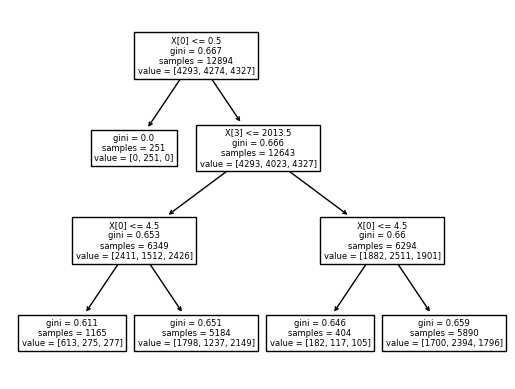

In [72]:
X_train, X_test, y_train, y_test = train_test_split(airp[features], airp[target], test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


plot_tree(clf)